<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week15-pca/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

#Note
1. scikit-learn 's PCA does not apply standardization to the input dataset, it only centers it by subtracting the mean.

pca.explained_variance_ratio_ [0.9651413 0.0348587]
cumsum of variance [0.9651413 1.       ]
eigenvalues (lambda) =  [6.69164633 0.241687  ]
eigenvectors (vectors)  [[ 0.6923352   0.72157603]
 [ 0.72157603 -0.6923352 ]]


(np.float64(0.7), np.float64(7.3), np.float64(2.75), np.float64(8.25))

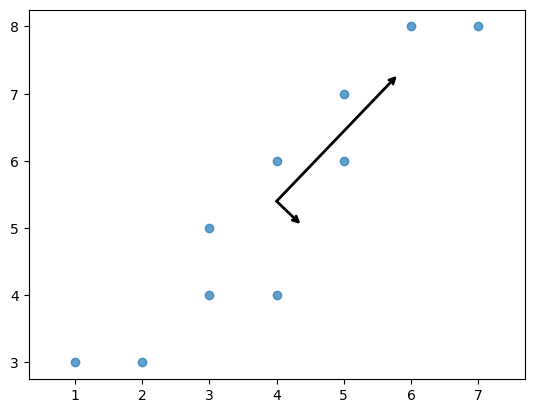

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

X = np.array([[1.0,3.0],
              [2.0,3.0],
              [3.0,4.0],
              [3.0,5.0],
              [4.0,4.0],
              [4.0,6.0],
              [5.0,6.0],
              [5.0,7.0],
              [6.0,8.0],
              [7.0,8.0]])

#Feature scaling
#In the real use, we should apply the feature scaling in the first step.
X_std = X #StandardScaler().fit_transform(X)
#print(X_std)

pca = PCA(n_components=2) # PCA(.95)
pca.fit(X_std)

print("pca.explained_variance_ratio_", pca.explained_variance_ratio_)
cs = np.cumsum(pca.explained_variance_ratio_)
print("cumsum of variance", cs)
print("eigenvalues (lambda) = ", pca.explained_variance_)
print("eigenvectors (vectors) ", pca.components_)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')


- Discover underlying factors with correlations between features and components

## Implement of Page 14 in lecture

In [18]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X) #p.14 on slide
print(X_pca)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

[[-3.80878808]
 [-3.11645288]
 [-1.70254164]
 [-0.98096562]
 [-1.01020644]
 [ 0.43294562]
 [ 1.12528082]
 [ 1.84685685]
 [ 3.26076808]
 [ 3.95310329]]
original shape:    (10, 2)
transformed shape: (10, 1)


## Page 16 of lecture

X_approx  [[1.36304193 2.65166982]
 [1.84236996 3.15124231]
 [2.82127048 4.17148676]
 [3.32084297 4.69215873]
 [3.30059852 4.67105925]
 [4.29974349 5.71240318]
 [4.77907153 6.21197567]
 [5.27864401 6.73264763]
 [6.25754454 7.75289208]
 [6.73687257 8.25246457]]  
 
X_original [[1. 3.]
 [2. 3.]
 [3. 4.]
 [3. 5.]
 [4. 4.]
 [4. 6.]
 [5. 6.]
 [5. 7.]
 [6. 8.]
 [7. 8.]]


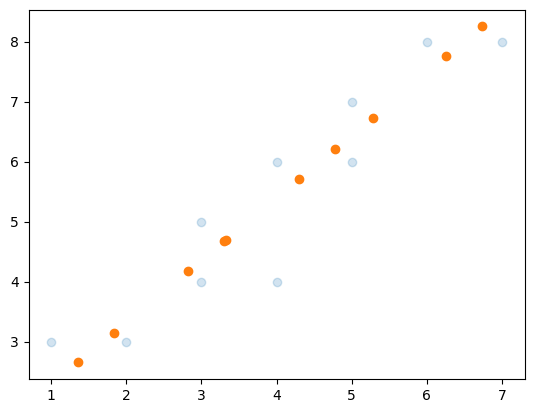

In [3]:
X_approx = pca.inverse_transform(X_pca)
print("X_approx ", X_approx, " \n ")
print("X_original",X)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
#ต้องปัดทศนิยมก่อน Ceil function
plt.scatter(X_approx[:, 0], X_approx[:, 1], alpha=1)
plt.show()
#plt.axis('equal');

# Implement PCA from scratch (Matrix 2x2)

In [4]:
import numpy as np
from scipy import linalg as LA

# Covariance
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x)-1)

# Covariance matrix
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

# Calculate covariance matrix
cc = cov_mat(X.T) # (or with np.cov(X.T))
print(cc)

evals , evecs = LA.eigh(cc)
print("evecs ",evecs)
print("evals ",evals)

[[3.33333333 3.22222222]
 [3.22222222 3.6       ]]
evecs  [[-0.72157603  0.6923352 ]
 [ 0.6923352   0.72157603]]
evals  [0.241687   6.69164633]


# Projection step

In [5]:
#idx = np.argsort(evals)[::-1]
#evecs = evecs[:,idx]
#evals = evals[idx]
e2 = np.array([evecs[1,:]])
print("e2 ",e2, "\n")
X -= np.mean(X, axis = 0) #step 2
print(X,"\n")
a = np.dot(e2,X.T)
print(a.T)

e2  [[0.6923352  0.72157603]] 

[[-3.  -2.4]
 [-2.  -2.4]
 [-1.  -1.4]
 [-1.  -0.4]
 [ 0.  -1.4]
 [ 0.   0.6]
 [ 1.   0.6]
 [ 1.   1.6]
 [ 2.   2.6]
 [ 3.   2.6]] 

[[-3.80878808]
 [-3.11645288]
 [-1.70254164]
 [-0.98096562]
 [-1.01020644]
 [ 0.43294562]
 [ 1.12528082]
 [ 1.84685685]
 [ 3.26076808]
 [ 3.95310329]]


# Retrieving old data (x1,x2)

In [6]:
#Reverse
b = np.dot(a.T,e2)
print(b," \n")
print(b+np.array([4,5.4]))


[[-2.63695807 -2.74833018]
 [-2.15763004 -2.24875769]
 [-1.17872952 -1.22851324]
 [-0.67915703 -0.70784127]
 [-0.69940148 -0.72894075]
 [ 0.29974349  0.31240318]
 [ 0.77907153  0.81197567]
 [ 1.27864401  1.33264763]
 [ 2.25754454  2.35289208]
 [ 2.73687257  2.85246457]]  

[[1.36304193 2.65166982]
 [1.84236996 3.15124231]
 [2.82127048 4.17148676]
 [3.32084297 4.69215873]
 [3.30059852 4.67105925]
 [4.29974349 5.71240318]
 [4.77907153 6.21197567]
 [5.27864401 6.73264763]
 [6.25754454 7.75289208]
 [6.73687257 8.25246457]]


# Exercise

1. Generate data using make_regression, sample = 100, dim = 20, random_state=1234 <br/>
2. Find PCA in data <br/>
 - model = PCA(.95) <br/>
 - model.fit(x) <br/>
3. show  <br/>
print("pca.explained_variance_ratio_", pca.explained_variance_ratio_) <br/>
cs = np.cumsum(pca.explained_variance_ratio_) <br/>
print(cs) <br/>
print(pca.explained_variance_) <br/>
print(pca.components_) <br/>
Plot bar chart of cumulative variance

# Application
## Apply PCA for dimension reduction and use Logistic Regression to classify the data.

In [7]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, #X
                                                           mnist.target, #y
                                                           test_size = 0.1,
                                                           random_state=0)
print(train_img.shape)
print(test_img.shape)


test_img_original = test_img.copy() #copy for reuse in visualized step.


#Standardization
scaler = StandardScaler()
scaler.fit(train_img)
train_img_std = scaler.transform(train_img)
test_img_std = scaler.transform(test_img)

(63000, 784)
(7000, 784)


In [28]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit(train_img_std)

print(pca.n_components_) #329 components explain 95% of variance from 768 features
print(pca.explained_variance_ratio_)
cs = np.cumsum(pca.explained_variance_ratio_)
print("cumsum of variance", cs)

train_img_compress = pca.transform(train_img_std)
test_img_compress = pca.transform(test_img_std)

400
[0.05671436 0.04047083 0.03753538 0.02914118 0.02524998 0.02200322
 0.01920165 0.01750663 0.01534805 0.01403067 0.01345596 0.01206541
 0.01117851 0.0109567  0.01031841 0.00997927 0.00933567 0.00922389
 0.00895114 0.00870465 0.00825657 0.00800672 0.00765328 0.00743891
 0.00719272 0.00694117 0.00687699 0.00662345 0.00630299 0.00614446
 0.00602085 0.00589295 0.00569335 0.00563158 0.00557288 0.00534532
 0.00530663 0.00519092 0.00510428 0.00482269 0.00478215 0.00467734
 0.00455263 0.00447202 0.00444518 0.00440869 0.00439085 0.0043174
 0.0042717  0.00416993 0.004072   0.00398319 0.00393296 0.00391567
 0.00386536 0.00374242 0.00372153 0.0036862  0.0036339  0.00360273
 0.00353315 0.00348031 0.00344659 0.00343489 0.00335186 0.00334152
 0.0033042  0.00320033 0.00317826 0.00315576 0.00311865 0.00308318
 0.00306167 0.00305505 0.00297158 0.00296861 0.00293492 0.00292709
 0.00290329 0.00288194 0.00284659 0.00282503 0.00280926 0.00279584
 0.00278464 0.00278224 0.00277792 0.0027613  0.00271768 0.0

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(train_img_std, train_lbl)
print(type(clf.feature_importances_))


<class 'numpy.ndarray'>


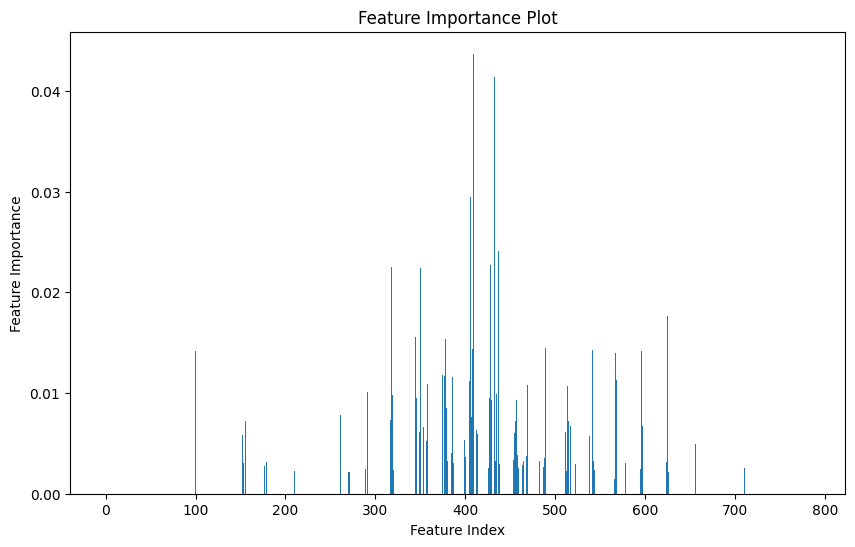

In [11]:
# prompt: Please plot bar graph with clf.feature_importances_

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.show()


In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs')
clf.fit(train_img_compress, train_lbl)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
print(clf.predict(test_img_compress[0].reshape(1,-1)))
print(clf.score(test_img_compress,test_lbl))

['0']
0.9251428571428572


Note that the title of each image is the predicted result.
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


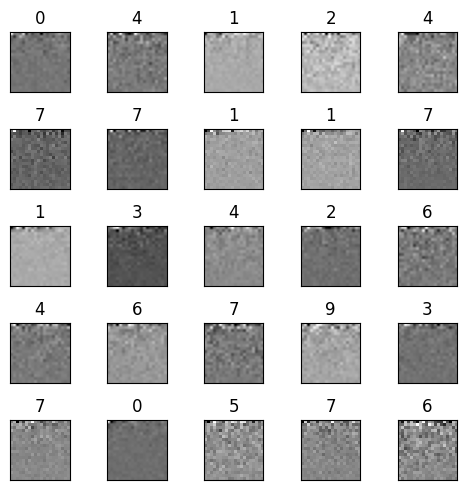

In [32]:
n_rows = 5
n_cols = 5
max_index = n_rows * n_cols
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols, n_rows),
                        subplot_kw={'xticks': [], 'yticks': []})

print("Note that the title of each image is the predicted result.")

for ax, i in zip(axs.flat, range(max_index)):

    # Convert array size 784x1 to 28x28 to be able to plot
    my_image = np.array(test_img_compress[i], dtype='float')
    #my_image = np.array(test_img_compress[i], dtype='float')
    pixels = my_image.reshape((28, 28))

    # Plot image with color mapping (cmap) in grayscale
    ax.imshow(pixels, cmap='gray')

    print(type(test_img_compress[i]))
    # Set title with its result
    result = clf.predict(test_img_compress[i].reshape(1,-1)) # convert dimension (327,) to (1,327)
    ax.set_title(result[0])

# Display plot
plt.tight_layout()
plt.show()

1. Further reading
- AutoEncoder
- GAN
